# __Objective__
Goal of this notebook to check which params contribute the best to global position. This shall help to pick most predictive statistical representation
- absolute values
- relative values
- values per match

In [4]:
import pandas as pd

df = pd.read_csv("../../data/shooting.csv")
standard_stats = pd.read_csv("../../data/standard_stats.csv")

columns_relative_values = [col for col in df.columns if col.endswith("_%") and col != "player"]
columns_per_match = [col for col in df.columns if col.endswith("_per_match") and col !="player" ]
columns_absolute_values = [col for col in df.columns if not col.endswith("_%") and not col.endswith("_per_match") and col != "player"]

df

,player,goals,goals_penalty,goals_header,goals_left_foot,goals_right_foot,goals_other_body_part,goals_with_first_touch,goals_in_goal_area,goals_in_penalty_area,...,up_goal_overhead_kick_per_match,up_goal_diving_header_per_match,up_xG_per_match,up_big_chances_total_per_match,up_big_chances_led_to_goal_per_match,up_last_minute_goals_per_match,equalizer_per_match,first_goal_per_match,leading_goal_per_match,goals_important_per_match
0,Aaron Hunt,1,1,0,1,0,0,0,0,1,...,0.0,0.0,0.004,0.000,0.0,0.000,0.000,0.000,0.000,0.000
1,Adam Hloušek,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000
2,Adelino André Vieira Freitas,1,0,0,0,1,0,1,0,1,...,0.0,0.0,0.003,0.000,0.0,0.000,0.000,0.000,0.000,0.000
3,Admir Mehmedi,2,0,0,0,2,0,0,0,2,...,0.0,0.0,0.005,0.000,0.0,0.011,0.000,0.011,0.011,0.022
4,Adnan Januzaj,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,Änis Ben-Hatira,1,0,0,0,1,0,0,0,1,...,0.0,0.0,0.007,0.011,0.0,0.000,0.000,0.011,0.000,0.011
400,Ömer Toprak,1,0,1,0,0,0,0,1,0,...,0.0,0.0,0.005,0.000,0.0,0.000,0.011,0.000,0.000,0.011
401,Özkan Yıldırım,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000
402,İlkay Gündoğan,1,0,0,0,1,0,1,0,1,...,0.0,0.0,0.009,0.011,0.0,0.000,0.000,0.000,0.000,0.000


In [5]:
df_merged = pd.merge(left=standard_stats.loc[:,["player","position"]], right=df, on="player",how="right")
df_merged = df_merged.set_index("player")
df_merged = df_merged.fillna(0)

df_merged

,position,goals,goals_penalty,goals_header,goals_left_foot,goals_right_foot,goals_other_body_part,goals_with_first_touch,goals_in_goal_area,goals_in_penalty_area,...,up_goal_overhead_kick_per_match,up_goal_diving_header_per_match,up_xG_per_match,up_big_chances_total_per_match,up_big_chances_led_to_goal_per_match,up_last_minute_goals_per_match,equalizer_per_match,first_goal_per_match,leading_goal_per_match,goals_important_per_match
player,,,,,,,,,,,,,,,,,,,,,
Aaron Hunt,Midfielder,1,1,0,1,0,0,0,0,1,...,0.0,0.0,0.004,0.000,0.0,0.000,0.000,0.000,0.000,0.000
Adam Hloušek,Defender,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000
Adelino André Vieira Freitas,"Defender, Forward",1,0,0,0,1,0,1,0,1,...,0.0,0.0,0.003,0.000,0.0,0.000,0.000,0.000,0.000,0.000
Admir Mehmedi,Midfielder,2,0,0,0,2,0,0,0,2,...,0.0,0.0,0.005,0.000,0.0,0.011,0.000,0.011,0.011,0.022
Adnan Januzaj,Forward,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Änis Ben-Hatira,Forward,1,0,0,0,1,0,0,0,1,...,0.0,0.0,0.007,0.011,0.0,0.000,0.000,0.011,0.000,0.011
Ömer Toprak,Defender,1,0,1,0,0,0,0,1,0,...,0.0,0.0,0.005,0.000,0.0,0.000,0.011,0.000,0.000,0.011
Özkan Yıldırım,Forward,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000


Class are unequally balanced. Merge them

In [6]:
df_merged.groupby("position")["goals"].count()

position
Defender                142
Defender, Forward         2
Forward                  97
Goalkeeper                1
Midfielder              147
Midfielder, Defender      2
Midfielder, Forward      13
Name: goals, dtype: int64

In [7]:
df_merged['position'] = df_merged['position'].str.replace("Defender, Forward", "Defender", case=False, regex=False)
df_merged['position'] = df_merged['position'].str.replace("Midfielder, Defender", "Midfielder", case=False, regex=False)
df_merged['position'] = df_merged['position'].str.replace("Midfielder, Forward", "Midfielder", case=False, regex=False)
df_merged.groupby("position")["goals"].count()


position
Defender      144
Forward        97
Goalkeeper      1
Midfielder    162
Name: goals, dtype: int64

In [8]:
# Check for inf values in df_merged
df_merged= df_merged.replace([np.inf, -np.inf], 0)
has_inf = df_merged.isin([np.inf, -np.inf]).any().any()

print(f"DataFrame contains inf values: {has_inf}")


DataFrame contains inf values: False


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

def evaluate_feature_sets(df, target_column='position'):
    """
    Evaluate different feature sets for predicting the target variable.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input dataframe containing features and target variable
    target_column : str, optional (default='position')
        Name of the target column to predict
    
    Returns:
    --------
    dict
        A dictionary with feature set names and their corresponding classification reports
    """
    # Define feature sets
    columns_relative_values = [col for col in df.columns if col.endswith("_%") and col != target_column]
    columns_per_match = [col for col in df.columns if col.endswith("_per_match") and col != target_column]
    columns_absolute_values = [col for col in df.columns if not col.endswith("_%") and not col.endswith("_per_match") and col != target_column]
    
    # Combine feature sets
    feature_sets = {
        'Relative Values': columns_relative_values,
        'Per Match Values': columns_per_match,
        'Absolute Values': columns_absolute_values,
        'Relative + Per Match': columns_relative_values + columns_per_match,
        'Relative + Absolute': columns_relative_values + columns_absolute_values,
        'Per Match + Absolute': columns_per_match + columns_absolute_values,
        'All Features': columns_relative_values + columns_per_match + columns_absolute_values
    }
    
    # Results dictionary to store classification reports
    results = {}
    
    # Iterate through feature sets
    for set_name, features in feature_sets.items():
        # Prepare the data
        X = df[features]
        y = df[target_column]
        
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # Create a pipeline with scaling and logistic regression
        pipeline = Pipeline([
            ('scaler', QuantileTransformer()),
            ('classifier', LogisticRegression(multi_class='ovr', max_iter=1000))
        ])
        
        # Fit the model
        pipeline.fit(X_train, y_train)
        
        # Predict and generate classification report
        y_pred = pipeline.predict(X_test)
        results[set_name] = classification_report(y_test, y_pred, output_dict=True)
        
        # Print the classification report for each feature set
        print(f"\nClassification Report for {set_name} Feature Set:")
        print(classification_report(y_test, y_pred, zero_division=0))
    
    return results

# Example usage (assuming df is your dataframe)
# results = evaluate_feature_sets(df)

# Optional: Compare overall performance
def compare_feature_set_performance(results):
    """
    Compare the performance of different feature sets based on macro avg f1-score.
    
    Parameters:
    -----------
    results : dict
        Dictionary of classification reports from evaluate_feature_sets
    
    Returns:
    --------
    list
        Sorted list of feature sets by macro avg f1-score
    """
    performance_ranking = sorted(
        [(set_name, report['macro avg']['f1-score']) for set_name, report in results.items()], 
        key=lambda x: x[1], 
        reverse=True
    )
    
    print("\nFeature Set Performance Ranking (Macro Avg F1-Score):")
    for rank, (set_name, score) in enumerate(performance_ranking, 1):
        print(f"{rank}. {set_name}: {score:.4f}")
    
    return performance_ranking

# Usage
results = evaluate_feature_sets(df_merged)
ranking = compare_feature_set_performance(results)


c:\Users\Alexander Lorenz\anaconda3\envs\aifc\Lib\site-packages\sklearn\preprocessing\_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (323). n_quantiles is set to n_samples.
  warnings.warn(
c:\Users\Alexander Lorenz\anaconda3\envs\aifc\Lib\site-packages\sklearn\preprocessing\_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (323). n_quantiles is set to n_samples.
  warnings.warn(
c:\Users\Alexander Lorenz\anaconda3\envs\aifc\Lib\site-packages\sklearn\preprocessing\_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (323). n_quantiles is set to n_samples.
  warnings.warn(
c:\Users\Alexander Lorenz\anaconda3\envs\aifc\Lib\site-packages\sklearn\preprocessing\_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (323). n_quantiles is set to n_samples.
  warnings.warn(



Classification Report for Relative Values Feature Set:
              precision    recall  f1-score   support

    Defender       0.39      0.61      0.47        23
     Forward       0.53      0.43      0.48        23
  Midfielder       0.62      0.46      0.52        35

    accuracy                           0.49        81
   macro avg       0.51      0.50      0.49        81
weighted avg       0.53      0.49      0.50        81


Classification Report for Per Match Values Feature Set:
              precision    recall  f1-score   support

    Defender       0.51      0.83      0.63        23
     Forward       0.50      0.39      0.44        23
  Midfielder       0.65      0.49      0.56        35

    accuracy                           0.56        81
   macro avg       0.56      0.57      0.54        81
weighted avg       0.57      0.56      0.55        81


Classification Report for Absolute Values Feature Set:
              precision    recall  f1-score   support

    Defender  

c:\Users\Alexander Lorenz\anaconda3\envs\aifc\Lib\site-packages\sklearn\preprocessing\_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (323). n_quantiles is set to n_samples.
  warnings.warn(
c:\Users\Alexander Lorenz\anaconda3\envs\aifc\Lib\site-packages\sklearn\preprocessing\_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (323). n_quantiles is set to n_samples.
  warnings.warn(
c:\Users\Alexander Lorenz\anaconda3\envs\aifc\Lib\site-packages\sklearn\preprocessing\_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (323). n_quantiles is set to n_samples.
  warnings.warn(



Classification Report for All Features Feature Set:
              precision    recall  f1-score   support

    Defender       0.51      0.87      0.65        23
     Forward       0.53      0.43      0.48        23
  Midfielder       0.65      0.43      0.52        35

    accuracy                           0.56        81
   macro avg       0.56      0.58      0.55        81
weighted avg       0.58      0.56      0.54        81


Feature Set Performance Ranking (Macro Avg F1-Score):
1. Relative + Per Match: 0.5547
2. All Features: 0.5462
3. Per Match Values: 0.5432
4. Absolute Values: 0.5432
5. Per Match + Absolute: 0.5354
6. Relative + Absolute: 0.5311
7. Relative Values: 0.4918


In [11]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    accuracy_score, 
    f1_score, 
    precision_score, 
    recall_score
)
import matplotlib.pyplot as plt
import seaborn as sns

def advanced_classifier_comparison(df, target_column='position', random_state=42):
    """
    Comprehensive comparison of multiple classifiers across different feature sets.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        Input dataframe containing features and target variable
    target_column : str, optional (default='position')
        Name of the target column to predict
    random_state : int, optional (default=42)
        Seed for reproducibility
    
    Returns:
    --------
    dict
        Detailed results of classifier performance
    """
    # Define classifiers
    classifiers = {
        'Logistic Regression': LogisticRegression(multi_class='ovr', max_iter=1000),
        'Decision Tree': DecisionTreeClassifier(random_state=random_state),
        'Random Forest': RandomForestClassifier(random_state=random_state),
        'Linear Regression': LinearRegression(),
        'SVM': SVC(decision_function_shape='ovr', random_state=random_state)
    }
    
    # Define feature sets
    columns_relative_values = [col for col in df.columns if col.endswith("_%") and col != target_column]
    columns_per_match = [col for col in df.columns if col.endswith("_per_match") and col != target_column]
    columns_absolute_values = [col for col in df.columns if not col.endswith("_%") and not col.endswith("_per_match") and col != target_column]
    
    feature_sets = {
        'Relative Values': columns_relative_values,
        'Per Match Values': columns_per_match,
        'Absolute Values': columns_absolute_values,
        'Relative + Per Match': columns_relative_values + columns_per_match,
        'Relative + Absolute': columns_relative_values + columns_absolute_values,
        'Per Match + Absolute': columns_per_match + columns_absolute_values,
        'All Features': columns_relative_values + columns_per_match + columns_absolute_values
    }
    
    # Results storage
    results = {}
    
    # Iterate through feature sets
    for set_name, features in feature_sets.items():
        # Check if features list is empty
        if not features:
            print(f"Skipping {set_name} due to empty feature set")
            continue
        
        # Prepare the data
        X = df[features]
        y = df[target_column]
        
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=random_state)
        
        # Store classifier results for this feature set
        results[set_name] = {}
        
        # Iterate through classifiers
        for clf_name, classifier in classifiers.items():
            try:
                # Create pipeline
                pipeline = Pipeline([
                    ('scaler', StandardScaler()),
                    ('classifier', classifier)
                ])
                
                # Perform cross-validation
                cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5)
                
                # Fit the model
                pipeline.fit(X_train, y_train)
                
                # Predictions
                y_pred = pipeline.predict(X_test)
                
                # Detailed metrics
                results[set_name][clf_name] = {
                    'cross_val_scores': cv_scores,
                    'mean_cv_score': cv_scores.mean(),
                    'std_cv_score': cv_scores.std(),
                    'accuracy': accuracy_score(y_test, y_pred),
                    'macro_f1': f1_score(y_test, y_pred, average='macro'),
                    'macro_precision': precision_score(y_test, y_pred, average='macro'),
                    'macro_recall': recall_score(y_test, y_pred, average='macro'),
                    'classification_report': classification_report(y_test, y_pred, output_dict=True),
                    'confusion_matrix': confusion_matrix(y_test, y_pred)
                }
                
                # Print detailed results
                print(f"\nResults for {set_name} - {clf_name}:")
                print(f"Cross-validation Scores: {cv_scores}")
                print(f"Mean CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
                print("\nClassification Report:")
                print(classification_report(y_test, y_pred, zero_division=0))
            
            except Exception as e:
                print(f"Error processing {set_name} - {clf_name}: {str(e)}")
    
    return results

def visualize_classifier_performance(results):
    """
    Create visualizations to compare classifier performance across feature sets.
    
    Parameters:
    -----------
    results : dict
        Results dictionary from advanced_classifier_comparison
    """
    # Prepare data for plotting
    feature_sets = list(results.keys())
    classifiers = list(results[feature_sets[0]].keys())
    
    # Accuracy comparison
    plt.figure(figsize=(15, 10))
    
    # Accuracy plot
    plt.subplot(2, 2, 1)
    accuracy_data = [[results[fs][clf]['accuracy'] for clf in classifiers] for fs in feature_sets]
    sns.heatmap(accuracy_data, annot=True, cmap='YlGnBu', 
                xticklabels=classifiers, yticklabels=feature_sets)
    plt.title('Accuracy Comparison')
    plt.xlabel('Classifiers')
    plt.ylabel('Feature Sets')
    
    # Macro F1 Score plot
    plt.subplot(2, 2, 2)
    f1_data = [[results[fs][clf]['macro_f1'] for clf in classifiers] for fs in feature_sets]
    sns.heatmap(f1_data, annot=True, cmap='YlGnBu', 
                xticklabels=classifiers, yticklabels=feature_sets)
    plt.title('Macro F1 Score Comparison')
    plt.xlabel('Classifiers')
    plt.ylabel('Feature Sets')
    
    # Macro Precision plot
    plt.subplot(2, 2, 3)
    precision_data = [[results[fs][clf]['macro_precision'] for clf in classifiers] for fs in feature_sets]
    sns.heatmap(precision_data, annot=True, cmap='YlGnBu', 
                xticklabels=classifiers, yticklabels=feature_sets)
    plt.title('Macro Precision Comparison')
    plt.xlabel('Classifiers')
    plt.ylabel('Feature Sets')
    
    # Macro Recall plot
    plt.subplot(2, 2, 4)
    recall_data = [[results[fs][clf]['macro_recall'] for clf in classifiers] for fs in feature_sets]
    sns.heatmap(recall_data, annot=True, cmap='YlGnBu', 
                xticklabels=classifiers, yticklabels=feature_sets)
    plt.title('Macro Recall Comparison')
    plt.xlabel('Classifiers')
    plt.ylabel('Feature Sets')
    
    plt.tight_layout()
    plt.show()

def find_best_classifier(results):
    """
    Find the best performing classifier across different metrics.
    
    Parameters:
    -----------
    results : dict
        Results dictionary from advanced_classifier_comparison
    
    Returns:
    --------
    dict
        Dictionary of best classifiers for different metrics
    """
    best_classifiers = {}
    metrics = ['accuracy', 'macro_f1', 'macro_precision', 'macro_recall']
    
    for metric in metrics:
        max_score = 0
        best_config = None
        
        for feature_set, classifiers in results.items():
            for clf_name, performance in classifiers.items():
                if performance[metric] > max_score:
                    max_score = performance[metric]
                    best_config = {
                        'feature_set': feature_set,
                        'classifier': clf_name,
                        'score': max_score
                    }
        
        best_classifiers[metric] = best_config
    
    print("\nBest Configurations:")
    for metric, config in best_classifiers.items():
        print(f"{metric.replace('_', ' ').title()}: {config['classifier']} with {config['feature_set']} (Score: {config['score']:.4f})")
    
    return best_classifiers

# Example usage
results = advanced_classifier_comparison(df_merged)


c:\Users\Alexander Lorenz\anaconda3\envs\aifc\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Alexander Lorenz\anaconda3\envs\aifc\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Alexander Lorenz\anaconda3\envs\aifc\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



Results for Relative Values - Logistic Regression:
Cross-validation Scores: [0.30434783 0.46376812 0.37681159 0.45588235 0.48529412]
Mean CV Score: 0.4172 (+/- 0.1347)

Classification Report:
              precision    recall  f1-score   support

    Defender       0.35      0.69      0.47        16
     Forward       0.57      0.21      0.31        19
  Midfielder       0.61      0.54      0.57        26

    accuracy                           0.48        61
   macro avg       0.51      0.48      0.45        61
weighted avg       0.53      0.48      0.46        61


Results for Relative Values - Decision Tree:
Cross-validation Scores: [0.34782609 0.44927536 0.46376812 0.47058824 0.51470588]
Mean CV Score: 0.4492 (+/- 0.1104)

Classification Report:
              precision    recall  f1-score   support

    Defender       0.37      0.62      0.47        16
     Forward       0.50      0.32      0.39        19
  Midfielder       0.50      0.42      0.46        26

    accuracy         

c:\Users\Alexander Lorenz\anaconda3\envs\aifc\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Alexander Lorenz\anaconda3\envs\aifc\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



Results for Per Match Values - Logistic Regression:
Cross-validation Scores: [0.5942029  0.57971014 0.49275362 0.47058824 0.52941176]
Mean CV Score: 0.5333 (+/- 0.0957)

Classification Report:
              precision    recall  f1-score   support

    Defender       0.50      0.81      0.62        16
     Forward       0.89      0.42      0.57        19
  Midfielder       0.69      0.69      0.69        26

    accuracy                           0.64        61
   macro avg       0.69      0.64      0.63        61
weighted avg       0.70      0.64      0.64        61


Results for Per Match Values - Decision Tree:
Cross-validation Scores: [0.46376812 0.55072464 0.44927536 0.60294118 0.55882353]
Mean CV Score: 0.5251 (+/- 0.1179)

Classification Report:
              precision    recall  f1-score   support

    Defender       0.40      0.75      0.52        16
     Forward       0.62      0.53      0.57        19
  Midfielder       0.73      0.42      0.54        26

    accuracy       

c:\Users\Alexander Lorenz\anaconda3\envs\aifc\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Alexander Lorenz\anaconda3\envs\aifc\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



Results for Per Match Values - Random Forest:
Cross-validation Scores: [0.55072464 0.63768116 0.55072464 0.55882353 0.57352941]
Mean CV Score: 0.5743 (+/- 0.0655)

Classification Report:
              precision    recall  f1-score   support

    Defender       0.54      0.88      0.67        16
     Forward       0.77      0.53      0.62        19
  Midfielder       0.73      0.62      0.67        26

    accuracy                           0.66        61
   macro avg       0.68      0.67      0.65        61
weighted avg       0.69      0.66      0.65        61

Error processing Per Match Values - Linear Regression: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Alexander Lorenz\ana

c:\Users\Alexander Lorenz\anaconda3\envs\aifc\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Alexander Lorenz\anaconda3\envs\aifc\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



Results for Absolute Values - Logistic Regression:
Cross-validation Scores: [0.5942029  0.57971014 0.49275362 0.47058824 0.52941176]
Mean CV Score: 0.5333 (+/- 0.0957)

Classification Report:
              precision    recall  f1-score   support

    Defender       0.50      0.81      0.62        16
     Forward       0.89      0.42      0.57        19
  Midfielder       0.69      0.69      0.69        26

    accuracy                           0.64        61
   macro avg       0.69      0.64      0.63        61
weighted avg       0.70      0.64      0.64        61


Results for Absolute Values - Decision Tree:
Cross-validation Scores: [0.47826087 0.47826087 0.44927536 0.58823529 0.5       ]
Mean CV Score: 0.4988 (+/- 0.0951)

Classification Report:
              precision    recall  f1-score   support

    Defender       0.47      0.56      0.51        16
     Forward       0.62      0.68      0.65        19
  Midfielder       0.57      0.46      0.51        26

    accuracy         

c:\Users\Alexander Lorenz\anaconda3\envs\aifc\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Alexander Lorenz\anaconda3\envs\aifc\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



Results for Absolute Values - Random Forest:
Cross-validation Scores: [0.53623188 0.62318841 0.57971014 0.58823529 0.60294118]
Mean CV Score: 0.5861 (+/- 0.0579)

Classification Report:
              precision    recall  f1-score   support

    Defender       0.52      0.88      0.65        16
     Forward       0.75      0.47      0.58        19
  Midfielder       0.68      0.58      0.62        26

    accuracy                           0.62        61
   macro avg       0.65      0.64      0.62        61
weighted avg       0.66      0.62      0.62        61

Error processing Absolute Values - Linear Regression: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Alexander Lorenz\anaco

c:\Users\Alexander Lorenz\anaconda3\envs\aifc\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Alexander Lorenz\anaconda3\envs\aifc\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



Results for Relative + Per Match - Logistic Regression:
Cross-validation Scores: [0.63768116 0.60869565 0.49275362 0.45588235 0.57352941]
Mean CV Score: 0.5537 (+/- 0.1379)

Classification Report:
              precision    recall  f1-score   support

    Defender       0.48      0.75      0.59        16
     Forward       0.73      0.42      0.53        19
  Midfielder       0.60      0.58      0.59        26

    accuracy                           0.57        61
   macro avg       0.60      0.58      0.57        61
weighted avg       0.61      0.57      0.57        61


Results for Relative + Per Match - Decision Tree:
Cross-validation Scores: [0.44927536 0.50724638 0.46376812 0.54411765 0.54411765]
Mean CV Score: 0.5017 (+/- 0.0791)

Classification Report:
              precision    recall  f1-score   support

    Defender       0.48      0.75      0.59        16
     Forward       0.71      0.53      0.61        19
  Midfielder       0.68      0.58      0.62        26

    accurac

c:\Users\Alexander Lorenz\anaconda3\envs\aifc\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Alexander Lorenz\anaconda3\envs\aifc\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



Results for Relative + Per Match - Random Forest:
Cross-validation Scores: [0.56521739 0.71014493 0.53623188 0.54411765 0.52941176]
Mean CV Score: 0.5770 (+/- 0.1353)

Classification Report:
              precision    recall  f1-score   support

    Defender       0.52      0.81      0.63        16
     Forward       0.77      0.53      0.62        19
  Midfielder       0.74      0.65      0.69        26

    accuracy                           0.66        61
   macro avg       0.68      0.66      0.65        61
weighted avg       0.69      0.66      0.66        61

Error processing Relative + Per Match - Linear Regression: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Alexander Lo

c:\Users\Alexander Lorenz\anaconda3\envs\aifc\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Alexander Lorenz\anaconda3\envs\aifc\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



Results for Relative + Absolute - Logistic Regression:
Cross-validation Scores: [0.63768116 0.60869565 0.49275362 0.45588235 0.57352941]
Mean CV Score: 0.5537 (+/- 0.1379)

Classification Report:
              precision    recall  f1-score   support

    Defender       0.48      0.75      0.59        16
     Forward       0.73      0.42      0.53        19
  Midfielder       0.60      0.58      0.59        26

    accuracy                           0.57        61
   macro avg       0.60      0.58      0.57        61
weighted avg       0.61      0.57      0.57        61


Results for Relative + Absolute - Decision Tree:
Cross-validation Scores: [0.53623188 0.50724638 0.47826087 0.52941176 0.47058824]
Mean CV Score: 0.5043 (+/- 0.0527)

Classification Report:
              precision    recall  f1-score   support

    Defender       0.46      0.69      0.55        16
     Forward       0.60      0.47      0.53        19
  Midfielder       0.64      0.54      0.58        26

    accuracy 

c:\Users\Alexander Lorenz\anaconda3\envs\aifc\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Alexander Lorenz\anaconda3\envs\aifc\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



Results for Relative + Absolute - Random Forest:
Cross-validation Scores: [0.5942029  0.68115942 0.49275362 0.58823529 0.57352941]
Mean CV Score: 0.5860 (+/- 0.1199)

Classification Report:
              precision    recall  f1-score   support

    Defender       0.50      0.88      0.64        16
     Forward       0.77      0.53      0.62        19
  Midfielder       0.70      0.54      0.61        26

    accuracy                           0.62        61
   macro avg       0.66      0.65      0.62        61
weighted avg       0.67      0.62      0.62        61

Error processing Relative + Absolute - Linear Regression: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Alexander Lore

c:\Users\Alexander Lorenz\anaconda3\envs\aifc\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Alexander Lorenz\anaconda3\envs\aifc\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



Results for Per Match + Absolute - Logistic Regression:
Cross-validation Scores: [0.56521739 0.56521739 0.50724638 0.44117647 0.51470588]
Mean CV Score: 0.5187 (+/- 0.0916)

Classification Report:
              precision    recall  f1-score   support

    Defender       0.52      0.81      0.63        16
     Forward       0.73      0.42      0.53        19
  Midfielder       0.68      0.65      0.67        26

    accuracy                           0.62        61
   macro avg       0.64      0.63      0.61        61
weighted avg       0.65      0.62      0.62        61


Results for Per Match + Absolute - Decision Tree:
Cross-validation Scores: [0.44927536 0.52173913 0.43478261 0.64705882 0.45588235]
Mean CV Score: 0.5017 (+/- 0.1571)

Classification Report:
              precision    recall  f1-score   support

    Defender       0.45      0.62      0.53        16
     Forward       0.79      0.58      0.67        19
  Midfielder       0.64      0.62      0.63        26

    accurac

c:\Users\Alexander Lorenz\anaconda3\envs\aifc\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Alexander Lorenz\anaconda3\envs\aifc\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



Results for Per Match + Absolute - Random Forest:
Cross-validation Scores: [0.53623188 0.63768116 0.55072464 0.57352941 0.57352941]
Mean CV Score: 0.5743 (+/- 0.0694)

Classification Report:
              precision    recall  f1-score   support

    Defender       0.48      0.81      0.60        16
     Forward       0.69      0.47      0.56        19
  Midfielder       0.67      0.54      0.60        26

    accuracy                           0.59        61
   macro avg       0.61      0.61      0.59        61
weighted avg       0.63      0.59      0.59        61

Error processing Per Match + Absolute - Linear Regression: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Alexander Lo

c:\Users\Alexander Lorenz\anaconda3\envs\aifc\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Alexander Lorenz\anaconda3\envs\aifc\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



Results for All Features - Logistic Regression:
Cross-validation Scores: [0.65217391 0.60869565 0.49275362 0.48529412 0.57352941]
Mean CV Score: 0.5625 (+/- 0.1300)

Classification Report:
              precision    recall  f1-score   support

    Defender       0.54      0.81      0.65        16
     Forward       0.67      0.42      0.52        19
  Midfielder       0.64      0.62      0.63        26

    accuracy                           0.61        61
   macro avg       0.62      0.62      0.60        61
weighted avg       0.62      0.61      0.60        61


Results for All Features - Decision Tree:
Cross-validation Scores: [0.49275362 0.47826087 0.46376812 0.57352941 0.52941176]
Mean CV Score: 0.5075 (+/- 0.0791)

Classification Report:
              precision    recall  f1-score   support

    Defender       0.46      0.69      0.55        16
     Forward       0.67      0.53      0.59        19
  Midfielder       0.68      0.58      0.62        26

    accuracy               

c:\Users\Alexander Lorenz\anaconda3\envs\aifc\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Alexander Lorenz\anaconda3\envs\aifc\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



Results for All Features - Random Forest:
Cross-validation Scores: [0.55072464 0.68115942 0.57971014 0.57352941 0.55882353]
Mean CV Score: 0.5888 (+/- 0.0946)

Classification Report:
              precision    recall  f1-score   support

    Defender       0.60      0.94      0.73        16
     Forward       0.69      0.47      0.56        19
  Midfielder       0.78      0.69      0.73        26

    accuracy                           0.69        61
   macro avg       0.69      0.70      0.68        61
weighted avg       0.71      0.69      0.68        61

Error processing All Features - Linear Regression: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Alexander Lorenz\anaconda3\e

c:\Users\Alexander Lorenz\anaconda3\envs\aifc\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


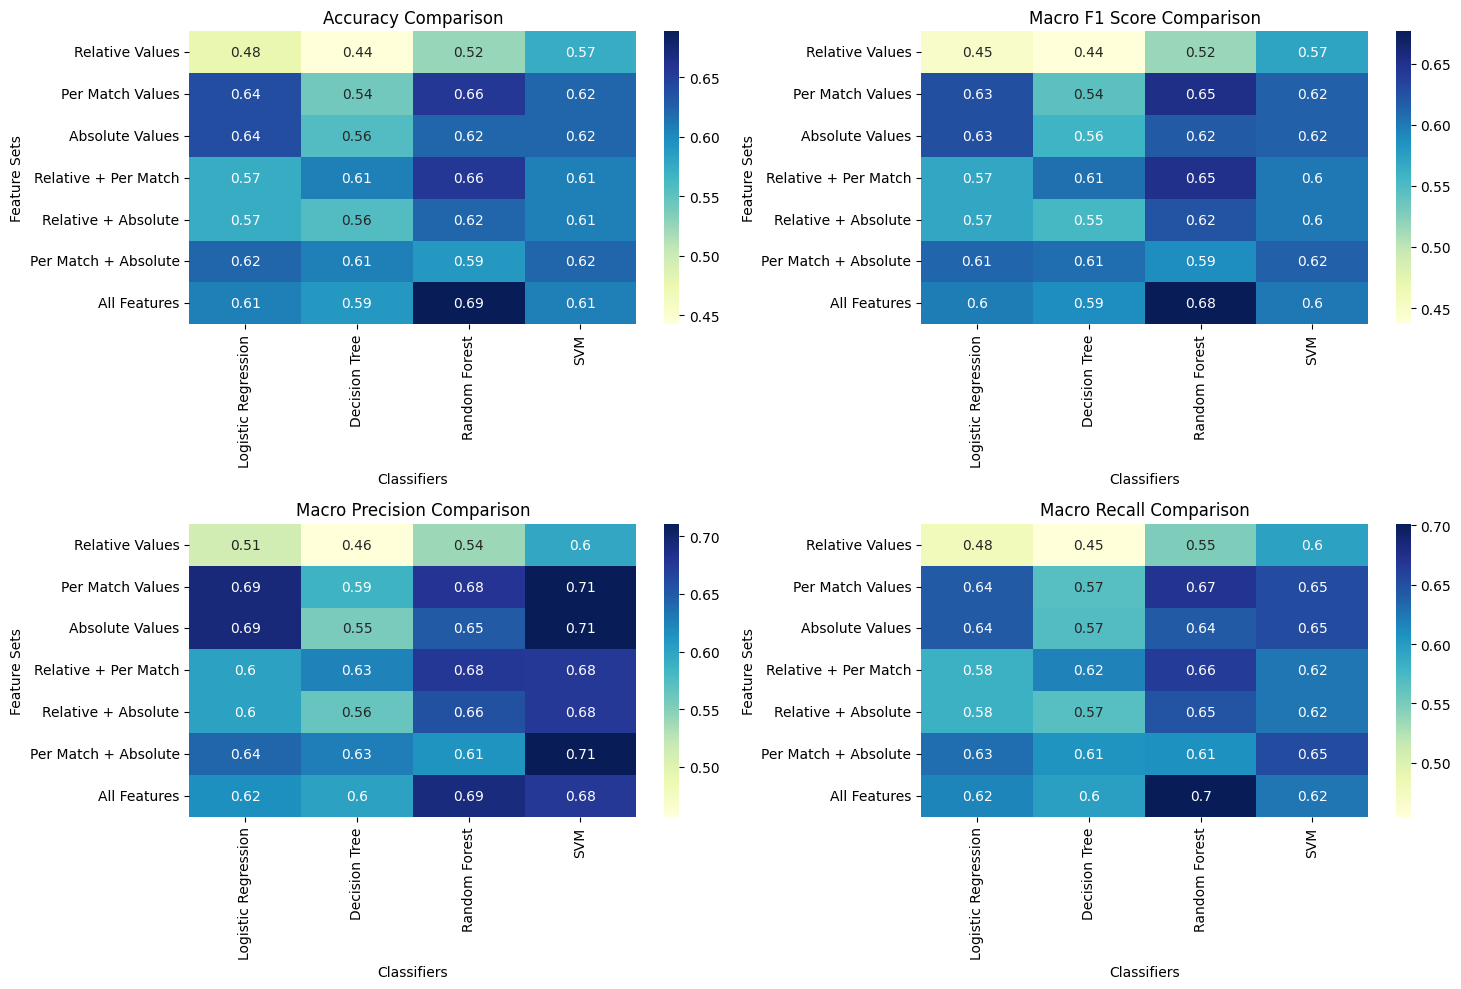

In [12]:
visualize_classifier_performance(results)

In [100]:
best_configs = find_best_classifier(results)
best_configs


Best Configurations:
Accuracy: Logistic Regression with Relative + Per Match (Score: 0.5185)
Macro F1: Logistic Regression with Relative + Per Match (Score: 0.5080)
Macro Precision: Logistic Regression with Relative + Per Match (Score: 0.5458)
Macro Recall: Logistic Regression with Relative + Per Match (Score: 0.5242)


{'accuracy': {'feature_set': 'Relative + Per Match',
  'classifier': 'Logistic Regression',
  'score': 0.5185185185185185},
 'macro_f1': {'feature_set': 'Relative + Per Match',
  'classifier': 'Logistic Regression',
  'score': 0.5080271804062126},
 'macro_precision': {'feature_set': 'Relative + Per Match',
  'classifier': 'Logistic Regression',
  'score': 0.5458296492779251},
 'macro_recall': {'feature_set': 'Relative + Per Match',
  'classifier': 'Logistic Regression',
  'score': 0.5242236024844721}}

In [95]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score

def recursive_feature_elimination(X, y, num_features_to_select=5):
    """
    Perform Recursive Feature Elimination with Linear Regression
    
    Parameters:
    X (DataFrame/array): Input features
    y (Series/array): Target variable
    num_features_to_select (int): Number of best features to select
    
    Returns:
    dict: Contains selected features, model, and performance metrics
    """
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Create the linear regression model
    lr = LinearRegression()
    
    # Perform Recursive Feature Elimination
    rfe = RFE(estimator=lr, n_features_to_select=num_features_to_select)
    rfe = rfe.fit(X_train_scaled, y_train)
    
    # Get selected features
    selected_features_mask = rfe.support_
    selected_feature_names = X.columns[selected_features_mask].tolist()
    
    # Train model with selected features
    X_train_selected = X_train_scaled[:, selected_features_mask]
    X_test_selected = X_test_scaled[:, selected_features_mask]
    
    lr_selected = LinearRegression()
    lr_selected.fit(X_train_selected, y_train)
    
    # Make predictions
    y_pred = lr_selected.predict(X_test_selected)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Feature ranking
    feature_ranking = pd.DataFrame({
        'feature': X.columns,
        'ranking': rfe.ranking_
    }).sort_values('ranking')
    
    return {
        'selected_features': selected_feature_names,
        'model': lr_selected,
        'mse': mse,
        'r2_score': r2,
        'feature_ranking': feature_ranking
    }
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X = df_merged.drop("position",axis=1)
y = label_encoder.fit_transform(df_merged["position"])

results = recursive_feature_elimination(X, y)
    
# Print results
print("Selected Features:", results['selected_features'])
print("\nFeature Ranking:")
print(results['feature_ranking'])
print(f"\nMean Squared Error: {results['mse']:.4f}")
print(f"R-squared Score: {results['r2_score']:.4f}")

Selected Features: ['up_goals_header', 'up_goal_half_volley', 'up_goals_header_per_match', 'up_goals_short_distance_per_match', 'up_goal_half_volley_per_match']

Feature Ranking:
                                 feature  ranking
170    up_goals_short_distance_per_match        1
81                   up_goal_half_volley        1
157            up_goals_header_per_match        1
47                       up_goals_header        1
191        up_goal_half_volley_per_match        1
..                                   ...      ...
175      up_shots_from_penalty_per_match      196
156           up_goals_penalty_per_match      197
194      up_goal_overhead_kick_per_match      198
138  shots_inside_penalty_area_per_match      199
102              shots_outside_the_box_%      200

[204 rows x 2 columns]

Mean Squared Error: 1.7313
R-squared Score: -0.0332
